# Multi-layer Forward-feed NN 

## 1. The role of alpha (regularization)
## 2. The confusion matrix
## 3. ANN on Facial Recognition

In [2]:
%matplotlib inline
# All imports

from __future__ import print_function, division
from random import choice
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
import time
from IPython import display

import sklearn
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.cross_validation import train_test_split

# -------------> The following three are new imports <------------------
from time import time
from sklearn.metrics import classification_report, confusion_matrix

np.set_printoptions(formatter={'float': '{:.5f}'.format})


/Users/labuser/scikit-learn/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Regularization

## A bit of math

## $$ \alpha \sum_w {w^2}$$

## Example: fitting the parabola with 100 neurons.

In [3]:
# simulating data
N = 40
xmin = 0.
xmax = 2.
x = np.linspace(xmin, xmax, N)
# expects a 2d array.
X = np.atleast_2d(x).T

a0 = 1.5
a1 = 2.
a2 = 2.5

y = a0 + a1*x + a2*x**2  # - a3*x**3 + a4*x**4
# add noise
y += np.random.randn(y.shape[0])*1. 


reg = MLPRegressor(algorithm='l-bfgs', hidden_layer_sizes=(100,), activation='tanh',\
                    random_state=1, max_iter=1000000, learning_rate_init = 0.01)



(30, 1) (30,)
(10, 1) (10,)
Default alpha (regularization): 0.0001
Total number of points: 30
Total number of weights: [(1, 100), (100, 1)]
score 0.962888350302
Loss function 0.521357396525


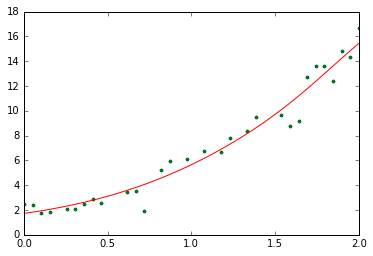

In [4]:
'''Splitting data into training and validation (testing) sets'''

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


print('Default alpha (regularization): {:g}'.format(reg.alpha))
# Try cranking up alpha (regularization):
reg.alpha = 0.3


reg.fit(X_train, y_train)
print("Total number of points:", y_train.shape[0])
print("Total number of weights:", [coef.shape for coef in reg.coefs_])
print("score", reg.score(X_train, y_train))
print("Loss function", reg.loss_)

x_train = X_train.ravel()
sort_i = np.argsort(x_train)
x_train = x_train[sort_i]
y_train = y_train[sort_i]
plt.plot(x_train, y_train, '.')

X_plot = np.atleast_2d(np.linspace(0., 2., 1000)).T
x_plot = X_plot.ravel()

y_predict = reg.predict(X_plot)
plt.plot(x_train, y_train, '.')
plt.plot(x_plot, y_predict)
plt.show()

score -0.689179640292


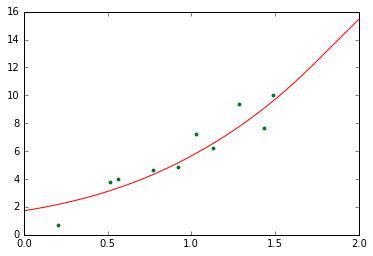

In [5]:
x_test = X_test.ravel()
sort_i = np.argsort(x_test)
x_test = x_test[sort_i]
y_test = y_test[sort_i]
plt.plot(x_test, y_test, '.')
print("score", reg.score(X_test, y_test))

plt.plot(x_test, y_test, '.')
plt.plot(x_plot, y_predict)
plt.show()


In [6]:
from sklearn.metrics import confusion_matrix

y_true = [5, 1, 5, 5, 1, 3]
y_pred = [1, 1, 5, 5, 1, 5]

confusion_matrix(y_true, y_pred)


array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

## The Confusion Matrix:  Evaluate the accuracy of a classification.

## Definition: a confusion matrix C is such that C\_{i, j} is equal to the number of observations known to be in group i but predicted to be in group j.

From: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [7]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

## The metric.classification_report

       metrics.classification_report
       
## "Build a text report showing the main classification metrics"

       sklearn.metrics.classification_report(y_true, y_pred)
       
       
## It returns a string.

## More details:

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

## Breakout

## To your digit recognition code last time, add:

- ## printing the classification_report

- ## printing confusion matrix 

[[45  0  0  0  0  0  0  0  0  3]
 [ 0 28 11  0  0  0  0  0 11  0]
 [ 0  0 41  4  0  1  0  1  3  0]
 [ 0  0  4 33  0  0  0  1  9  4]
 [ 0  2  0  0 38  0  8  0  0  1]
 [ 1  0  0  1  0 25  2  0  0 21]
 [ 1  0  0  0  0  0 49  0  0  0]
 [ 0  2  0  0  0  1  0  1  3 42]
 [ 0  2  0  0  0  0  0  0 46  4]
 [ 0 10  1  0  0  0  0  2  3 35]]
             precision    recall  f1-score   support

          0       0.96      0.94      0.95        48
          1       0.64      0.56      0.60        50
          2       0.72      0.82      0.77        50
          3       0.87      0.65      0.74        51
          4       1.00      0.78      0.87        49
          5       0.93      0.50      0.65        50
          6       0.83      0.98      0.90        50
          7       0.20      0.02      0.04        49
          8       0.61      0.88      0.72        52
          9       0.32      0.69      0.43        51

avg / total       0.71      0.68      0.67       500



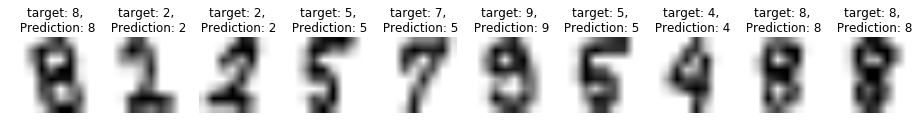

In [8]:
from sklearn import datasets

digits = datasets.load_digits()

# clf = MLPClassifier(algorithm='l-bfgs', alpha=1e-5, hidden_layer_sizes=(4, 2), random_state=1)
clf2 = MLPClassifier(algorithm='l-bfgs', alpha=1e-10, hidden_layer_sizes=(10, 4), activation = 'tanh', \
                    random_state=5, max_iter=1000000, learning_rate_init = 0.1)

N = 500

y_train = digits.data[:N]
y_test = digits.data[N:N+N]

y_test_target = digits.target[N:N+N]

clf2.fit(y_train, digits.target[:N])


y_pred = clf2.predict(np.atleast_2d(y_test))
# print('Train Score: {}'.format(y_train))
# print('Test Score: {}'.format(y_test))
# print(np.shape(y_train), np.shape(y_test))



print(confusion_matrix(y_test_target, y_pred))
print(classification_report(y_test_target, y_pred))

plt.figure(figsize=(16, 4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(digits.images[N+i], cmap =plt.cm.gray_r)
    plt.title('target: {},\n Prediction: {}'.format(digits.target[N+i], clf2.predict(np.atleast_2d(digits.data[N+i]))[0]))
    plt.axis('off')
plt.show()

## Applying ANN to Facial Recogition

In [9]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [12]:
data = lfw_people['images']
print(data.shape)

(1288, 50, 37)


## Mini-breakout
## Determine how to extract information from the object:

      lfw_people

## Breakout:

## Apply ANN to Facial Recogition

## Part I: Apply it to one person -- say the first in the data set

## Part II: Apply it to all individuals with 70 pictures or more.

1. Split into a training and testing set (test_size = .25)
2. Train a NN classification model using the training set.
3. Report the score of the trainied NN applied to the training data.
4. Apply the trained NN to the testing data, and report the score.
5. Also print the sklearn classification report and confusion_matrix 
7. Time the training and testing stages.
8. Use one intermediate layer.  You may vary the number of neurons.  But it shouldn't be greater than 1000.
9. Show the first 12 images in the testing set in a 3 by 4 arrangement for human inspection.  The title should show the predicted name and the true name of the person.



# End of Week10-2